From: https://stackoverflow.com/questions/41105754/heat-map-half-sphere-plot

[[0.         0.         0.73995764]
 [0.         0.17453293 0.75226274]
 [0.         0.34906585 0.70818577]
 ...
 [6.28318531 1.22173048 0.35324908]
 [6.28318531 1.3962634  0.8069016 ]
 [6.28318531 1.57079633 0.06810976]]


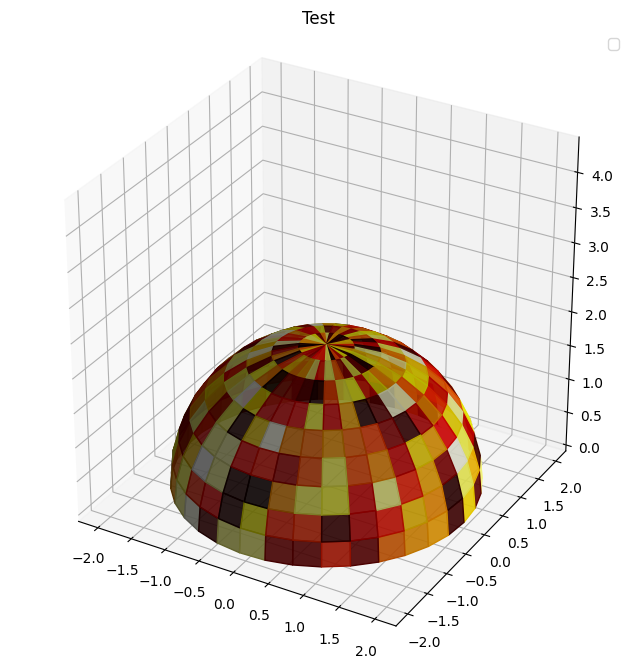

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#theta inclination angle
#phi azimuthal angle
n_theta = 10 # (originally: 50) number of values for theta
n_phi = 36 # (originally: 200) number of values for phi
r = 2        #radius of sphere

theta, phi = np.mgrid[0.0:0.5*np.pi:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

# mimic the input array
# array columns phi, theta, value
# first n_theta entries: phi=0, second n_theta entries: phi=0.0315..
inp = []
for j in phi[0,:]:
    for i in theta[:,0]:
#        val = 0.7+np.cos(j)*np.sin(i+np.pi/4.)# put something useful here
        val = np.random.uniform(0,1)  # put something useful here
        inp.append([j, i, val])
inp = np.array(inp)
print(inp)
#print inp.shape
#print inp[49:60, :]

#reshape the input array to the shape of the x,y,z arrays.
c = inp[:,2].reshape((n_phi,n_theta)).T
#print z.shape
#print c.shape


#Set colours and render
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#use facecolors argument, provide array of same shape as z
# cm.<cmapname>() allows to get rgba color from array.
# array must be normalized between 0 and 1
ax.plot_surface(
    x,y,z,  rstride=1, cstride=1, facecolors=cm.hot(c/c.max()), alpha=0.9, linewidth=1)
ax.set_xlim([-2.2,2.2])
ax.set_ylim([-2.2,2.2])
ax.set_zlim([0,4.4])
ax.set_aspect("equal")
#ax.plot_wireframe(x, y, z, color="k") #not needed?!
#plt.savefig(__file__+".png")
plt.title("Test")
# labels = np.sum(np.square(inp - 0.5),axis=1)<.025
plt.legend()
plt.show()